# YOLOv8

O modelo YOLOv8 é o mais novo estado-da-arte para detecção de objetos, classificação de imagens e tarefas de segmentação de instâncias. O YOLOv8 foi desenvolvido pela Ultralytics, que também criou o influente e definidor de padrões da indústria, modelo YOLOv5. O YOLOv8 inclui várias mudanças arquiteturais e melhorias na experiência de desenvolvedor em relação ao YOLOv5.

O YOLOv8 está em desenvolvimento ativo no momento em que este post é escrito, enquanto a Ultralytics trabalha em novos recursos e responde aos feedbacks da comunidade. De fato, quando a Ultralytics lança um modelo, ele recebe suporte de longo prazo: a organização trabalha com a comunidade para tornar o modelo o melhor possível.

## Objetivo:

Criar um detector de ovelhas usando o YOLOv8

## GPU:
Verificar GPU disponível

In [ ]:
!nvidia-smi

Tue Jul 11 18:54:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Drive

Montar o google drive onde estão as imagens de treino e validação que será usado nesse colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset

Copiar o dataset com suas respectivas pastas e imagens de teste para a raiz do colab

In [ ]:
!cp -r /content/drive/MyDrive/yolov8/helmet_vest_dataset_yolov8 ./

## Biblioteca

Instalar a biblioteca ultralytics que onde é possível fazer o treinamento do YOLOv8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 33.2 MB/s eta 0:00:00


bibliotecas necessárias para utilizar o modelo YOLO (You Only Look Once) para detecção de objetos em imagens. As bibliotecas são:

* ultralytics: biblioteca que implementa o YOLO e outras arquiteturas de detecção de objetos.
* os: biblioteca para interação com o sistema operacional.
* cv2: biblioteca para processamento de imagens.
* google.colab.patches: biblioteca para exibição de imagens no Colab.
* matplotlib.pyplot: biblioteca para plotagem de gráficos e imagens.
* locale: biblioteca para configuração regional.

A função getpreferredencoding é definida para retornar "UTF-8" como a codificação preferida. A função getpreferredencoding é usada internamente por outras funções do Python que manipulam strings. A definição de uma codificação preferida é importante quando trabalhamos com caracteres acentuados ou caracteres de outros alfabetos.

Note que a definição da função getpreferredencoding sobrescreve a implementação padrão, que pode ser obtida executando locale.getpreferredencoding() sem a definição da função.

In [ ]:
from ultralytics import YOLO
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import locale


def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding


# YAML

É necessário criar um arquivo .yaml. Esse arquivo é responsável por toda a estrutura que será treinado o YOLOv8

In [ ]:
!touch configs_modelo.yaml

In [ ]:
%%writefile configs_modelo.yaml
path: '/content/helmet_vest_dataset_yolov8'
train: 'train/images'
val: 'valid/images'
test: 'test/images'

nc: 4
names: ['helmet', 'no-helmet', 'no-vest', 'vest']

Overwriting configs_modelo.yaml


In [ ]:
diretorio_raiz = '/content/'
arquivo_config  = os.path.join(diretorio_raiz, 'configs_modelo.yaml')

# Modelo YOLOv8

Existem cinco modelos pre-treinados da YOLOv8:

* Yolov8-nano
* Yolov8-small
* Yolov8-medium
* Yolov8-large
* Yolov8-extra large

In [ ]:
model = YOLO('yolov8s.yaml')


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

# Treinamento

Para treinar o modelo YOLOv8 basta usar apenas o comando .train. Os parâmetros necessários para essa função são:

* .yaml com as infos necessarias
* epocas
* tamanho da imagem
* nome do seu modelo

In [ ]:
resultados = model.train(data=arquivo_config, epochs=50, imgsz=720, name='yolov8s_helmet_vest')


Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/configs_modelo.yaml, epochs=50, patience=50, batch=16, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_helmet_vest, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

In [ ]:
dir_resultados = '/content/runs/detect/yolov8s_helmet_vest'

In [ ]:
!yolo task=detect mode=val model={dir_resultados}/weights/best.pt name=yolov8s_helmetVest_eval data=configs_modelo.yaml

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/helmet_vest_dataset_yolov8/valid/labels.cache... 620 images, 14 backgrounds, 0 corrupt: 100% 622/622 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 39/39 [00:20<00:00,  1.87it/s]
                   all        622       2629      0.818      0.764      0.834      0.436
                helmet        622       1079      0.843      0.773      0.843      0.435
             no-helmet        622        322      0.889      0.794      0.877      0.417
               no-vest        622        515      0.733      0.649      0.732      0.352
                  vest        622        713      0.808      0.841      0.885      0.538
Speed: 2.4ms preprocess, 11.8ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/yolov8s_helmetVest

In [ ]:
!yolo task=detect mode=predict model={dir_resultados}/weights/best.pt source='/content/c.jpg' save=true

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/1 /content/c.jpg: 512x736 1 helmet, 7 no-helmets, 7 no-vests, 74.4ms
Speed: 5.4ms preprocess, 74.4ms inference, 124.4ms postprocess per image at shape (1, 3, 512, 736)
Results saved to runs/detect/predict3


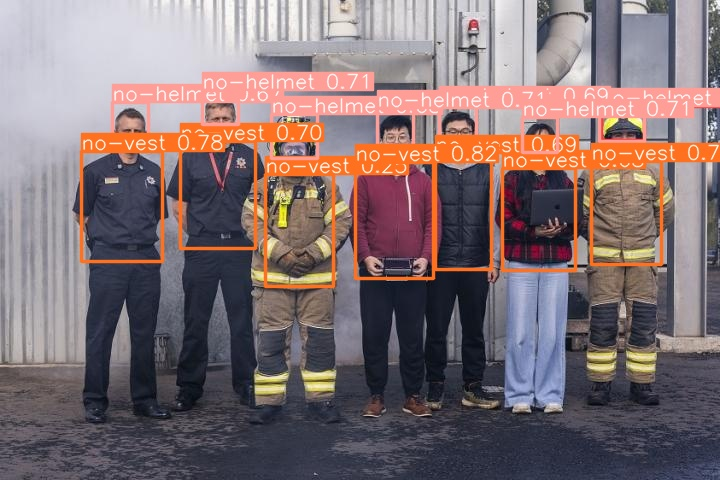

In [ ]:
dir_predicts = 'runs/detect/predict3/'
image_path = [os.path.join(dir_predicts, f) for f in os.listdir(dir_predicts)]
for path_img in image_path:
    img = cv2.imread(path_img)
    cv2_imshow(img)

# Continuar o treinamento

In [ ]:
!yolo task=detect mode=train model={dir_resultados}/weights/last.pt data={arquivo_config} epochs=20

Ultralytics YOLOv8.0.68 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/yolov8s_sheep/weights/last.pt, data=/content/configs_modelo.yaml, epochs=20, patience=50, batch=16, imgsz=736, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, o

In [ ]:
!yolo task=detect mode=val model={dir_resultados}/weights/best.pt name=yolov8s_helmetVest_eval data=configs_modelo.yaml

2023-04-07 00:34:27.538386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.68 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/val/labels.cache... 22 images, 0 backgrounds, 2 corrupt: 100% 22/22 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/dataset/val/images/sheep181.png: ignoring corrupt image/label: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.47it/s]
                   all         21         37      0.998      0.946      0.974      0.815
Speed: 0.2ms preprocess, 22.9ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/yolov8s_sheep_eval2

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source='/content/dataset/teste_1.png' save=true

2023-04-07 00:34:55.080091: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.68 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/dataset/teste_1.png: 576x736 9 sheeps, 59.2ms
Speed: 0.9ms preprocess, 59.2ms inference, 90.3ms postprocess per image at shape (1, 3, 736, 736)
Results saved to runs/detect/predict2


In [ ]:
dir_predicts = 'runs/detect/predict2/'
image_path = [os.path.join(dir_predicts, f) for f in os.listdir(dir_predicts)]
for path_img in image_path:
    img = cv2.imread(path_img)
    cv2_imshow(img)

# Copiar para o Google Drive

In [ ]:
!cp -R /content/runs/detect/yolov8s_helmet_vest/weights/best.pt /content/drive/MyDrive/yolov8

In [ ]:
model_finish = YOLO('/content/runs/detect/train/weights/best.pt')
model_finish.export(format='onnx')

# Aplicar em video com modelo treinado  *
